# Pandas Tricks

*Rappel et/ou découverte de manipulation de matrices de données avec pandas*

### Lire un tableur



In [24]:
import pandas as pd

# préciser le chemin du fichier à lire
cheminDuFichierCSV = "./../data/dictionary/1757_Buchanan-J.csv" 

# demander à pandas de lire le fichier et garder ce tableau accessible dans une variable
dfDicoBuch = pd.read_csv(cheminDuFichierCSV, delimiter=";", encoding="utf8")

# afficher à l'écran un échantillon du tableau
dfDicoBuch.sample(n=5)

,nbSyll,pron,origin,warning,remarques,POS,lineId,pageId
13753,1,thătch,NaN,NaN,NaN,n.,70.0,212
13211,2,ſtūʹpid,L.,NaN,NaN,a.,28.0,205
1327,4,bĭtūʹmĭn_o_us,L.,NaN,NaN,a.,72.0,37
14382,5,văʹrĭĕgāted,L.,NaN,NaN,a.,53.0,221
7123,5,insĕʹpărable,L.,NaN,NaN,a.,29.0,120


Pour lires des tableurs aux format xls, xlsx ou odt il faut utiliser pd.read_excel(cheminDuFichier) et je conseil de bien préciser explicitement l'engine à utiliser en paramètre.
* dfXlsx = pd.read_excel(cheminDuFichierXLSX, engine="openpyxl")
* dfOds = pd.read_excel(cheminDuFichierODS, engine="odf")

### Ajouter un nouvelle colonne contenant le resultat d'un traitement

In [25]:
# définir une fonction qui retourne quelque chose
def sizePron(strPron):
    #retourner le nombre de caractère de la prononciation
    
    return len(strPron)



In [26]:
# appeler cette fonction sur toutes les lignes de la matrice pour remplir une nouvelle colonne grace à apply
dfDicoBuch['sizePron'] = dfDicoBuch.apply(lambda x: sizePron(x['pron']),1)

dfDicoBuch.sample(n=5)

,nbSyll,pron,origin,warning,remarques,POS,lineId,pageId,sizePron
913,4,auʹdĭtory,NaN,NaN,NaN,n.,15.0,32,9
1223,2,benŭʹm_b_,NaN,NaN,NaN,v.,40.0,36,9
15270,3,vŏʹlŭme,NaN,NaN,NaN,n.,8.0,234,7
1413,2,bŏʹltſprit,NaN,NaN,NaN,n.,14.0,39,10
1651,2,bŭʹrden,NaN,NaN,NaN,n.,34.0,42,7


## Un petit calcul

In [27]:
dfDicoBuch['sizePron'].median()

9.0

## Une recherche de valeur

In [28]:
dfDicoBuch[dfDicoBuch['sizePron']==26.0]

,nbSyll,pron,origin,warning,remarques,POS,lineId,pageId,sizePron
2813,3,contrŏʹller or comptrollĕr,NaN,NaN,NaN,n.,49.0,58,26
7492,3,kaʹlĕnd_a_r or caʹlĕnd_a_r,NaN,NaN,NaN,n.,2.0,125,26


## Afficher des graphiques
Plusieurs librairie possibles :
* matplotlib (static, bonne qualité pour publication)
* seaborn (interactif, pour le web)
* bokeh (interactif, pour le web)
* plotly (interactif, pour le web)

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

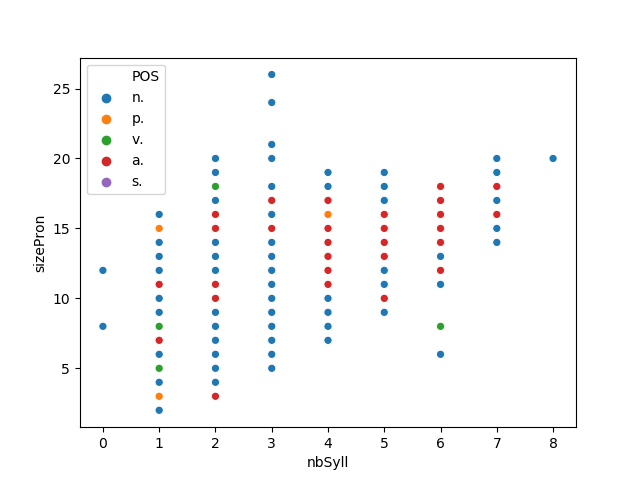

In [30]:
%matplotlib ipympl

plt.figure("scatter plot view")
sns.scatterplot(data=dfDicoBuch, x="nbSyll", y="sizePron", hue="POS")

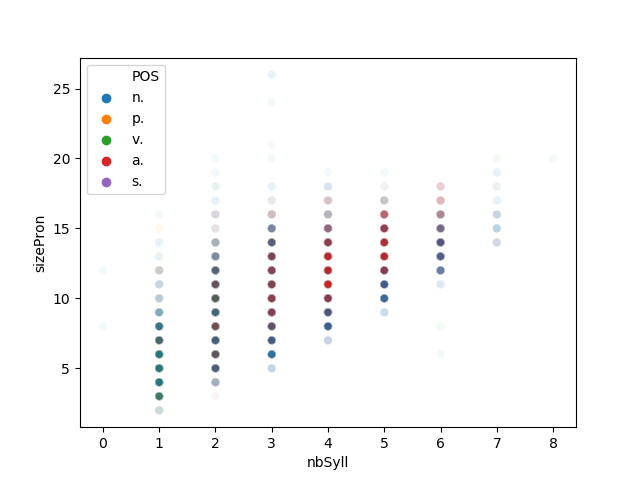

In [43]:
%matplotlib ipympl

plt.figure("scatter plot view")
sns.scatterplot(data=dfDicoBuch, x="nbSyll", y="sizePron", hue="POS", alpha=0.05)

## Manipuler des matrices de format exotique

In [32]:
cheminDuDicoBigi = "./../data/dictionary/2015_Bigi-B.dict" 

# ouvrir une matric exotique
#dfDicoBigi = pd.read_csv(cheminDuDicoBigi, delimiter=" [] ", encoding="utf8")

dfDicoBigi = pd.read_csv(cheminDuDicoBigi, delimiter=" \[\] ", encoding="utf8", engine='python', names=['hwd','pronSampa'], skiprows=8 )

# afficher à l'écran un échantillon du tableau
dfDicoBigi.head(n=5)

,hwd,pronSampa
0,a,@
1,a(2),eI
2,a'ready,@ r\ E d i:
3,a's,eI z
4,a.,eI


Intro/rappel Regex : https://gitlab.huma-num.fr/mnauge/cnam-athon-transcrire/-/blob/master/codes/regexBasics.ipynb

## Jouer avec deux matrices à la fois

In [33]:
cheminDuMappingSampaIpa = "./../data/dictionary/sampa-ipa.txt" 
dfMappingSampaIpa = pd.read_csv(cheminDuMappingSampaIpa, delimiter="  *", encoding="utf8", engine='python', names=['sampa','ipa'])
dfMappingSampaIpa.sample(n=3)

,sampa,ipa
46,I,ɪ
53,K\,ɮ
107,_k,̰


In [34]:
dfMappingSampaIpa['sampa'].value_counts()

r      3
U~/    2
h      2
@      2
g      2
      ..
_x     1
_R     1
y      1
O:     1
_e     1
Name: sampa, Length: 177, dtype: int64

In [35]:
dfMappingSampaIpa[dfMappingSampaIpa['sampa']=='@']

,sampa,ipa
28,@,ə
29,@,ɛ


In [36]:
# ne garder que la première occurence pour éviter une indécision mais ce n'est pas terrible. A discuter avec les linguistes.
dfMappingSampaIpa.drop_duplicates(subset=['sampa'], keep='first', inplace=True)

In [37]:
dfMappingSampaIpa[dfMappingSampaIpa['sampa']=='@']

,sampa,ipa
28,@,ə


In [38]:
def sampa2ipa(strSampa, dfMapping):
    ipaRes = ""
    
    listValSampa = strSampa.split(" ")
    #print(listValSampa)
    for valSampa in listValSampa:
        dfRowFinded = dfMapping[dfMapping['sampa']==valSampa]

        if len(dfRowFinded==1):
            ipaRes+=dfRowFinded.iloc[0]['ipa']
        else:
            ipaRes+='?'
    return ipaRes

In [39]:
sampa2ipa("A r\ t i",dfMappingSampaIpa)

'ɑɹti'

In [40]:
dfDicoBigiRich = dfDicoBigi.copy()

dfDicoBigiRich['ipa'] = dfDicoBigiRich.apply(lambda x: sampa2ipa(x['pronSampa'], dfMappingSampaIpa),1)


In [41]:
dfDicoBigiRich.sample(n=5)

,hwd,pronSampa,ipa
116831,tenths,t E n T s,tɛnθs
111773,state,s t eI t,st?t
73894,mccain,m @ k eI n,mək?n
76346,micronesia,m aI k r\ @U n i: Z @,m?kɹoʊniːʒə
22000,colgan,k @U l g @ n,koʊlgən


### Sauvegarder la nouvelle matrice


In [42]:
pathDicoBigiRich = "./../data/dataframe/BigiRichSample.csv"
dfDicoBigiRich.to_csv(pathDicoBigiRich, sep=";",encoding="utf8",index=False)